# Simulation 2 - Paradoxe du Duc de Toscane
Si on lance 3 dés, on constate qu'il y a le même nombre de façons d'écrire 9 ou 10 comme somme.

$
\begin{align*}
1+2+6&=9\\
1+3+5&=9 \\
1+4+4&=9 \\
2+2+5&=9 \\
2+3+4&=9 \\
3+3+3&=9 
\end{align*} $


$
\begin{align*}
1+3+6&=10\\
1+4+5&=10 \\
2+2+6&=10 \\
2+3+5&=10 \\
2+4+4&=10 \\
3+3+4&=10 
\end{align*}
$

Pourtant, a-t-on la même probabilité d'obtenir 9 ou 10 lorsqu'on fait la somme de ces 3 dés ?



In [13]:
from random import randint
D=0
N=0
M=1000 #Taille de l'échantillon
for i in range(M):
    a=randint(1,6)
    b=randint(1,6)
    c=randint(1,6)
    if(a+b+c==9): 
        N=N+1 #compteur du nombre d'apparition de la somme 9
    if(a+b+c==10): 
        D=D+1 #compteur du nombre d'apparition de la somme 10
        
print("La somme 9 est apparue ",N, " fois.")
print("La somme 10 est apparue ",D, " fois.")

La somme 9 est apparue  122  fois.
La somme 10 est apparue  124  fois.


Puisque ce test n'est pas suffisant, on peut se demander quelle taille d'échantillon faut-il utiliser pour distinguer ces 2 probabilités?

In [9]:
taille_échantillon=1000 #taille des échantillons que l'on peut modifier
from random import randint
def frequence_dix(M): #M: Taille de l'échantillon
    D=0
    for i in range(M):
        a=randint(1,6)
        b=randint(1,6)
        c=randint(1,6)
        if(a+b+c==10): 
            D=D+1 #compteur du nombre d'apparition de la somme 10
    return(D/M) #affichage de la fréquence

def frequence_neuf(M): #M: Taille de l'échantillon
    N=0
    for i in range(M):
        a=randint(1,6)
        b=randint(1,6)
        c=randint(1,6)
        if(a+b+c==9): 
            N=N+1 #compteur du nombre d'apparition de la somme 10
    return(N/M) #affichage de la fréquence 
F9=frequence_neuf(taille_échantillon)
F10=frequence_dix(taille_échantillon)
print("La fréquence du nombre 10 est ", F10)    
print("La fréquence du nombre 9 est ", F9)
if F9<F10:
    print("Pour cet échantillon de taille", taille_échantillon,", le nombre 10 est apparu plus souvent que le nombre 9.")
else:
    print("Pour cet échantillon de taille", taille_échantillon,", le nombre 9 est apparu plus souvent que le nombre 10.")
 

La fréquence du nombre 10 est  0.126
La fréquence du nombre 9 est  0.118
Pour cet échantillon de taille 1000 , le nombre 10 est apparu plus souvent que le nombre 9.


En théorie, ces deux intervalles de fluctuation ne se chevaucheraient pas avec une probabilité d'au moins $0,975 \times 0,975 = 0,950625$, ce que le programme suivant peut tester avec la bonne taille d'échantillon.

In [10]:
N=100
M=45000 #tester différentes tailles d'échantillon pour avoir une fréquence suffisamment élevée
C=0
for i in range(N):
    if abs(frequence_dix(M)-frequence_neuf(10))>2/sqrt(M):
        C=C+1
        
print(C/N)

1.0


# Dés de Jeanne

Jeanne lance 5 dés. À chaque lancer, si un dé (ou plusieurs) affiche 6, elle le ou les met de côté, puis
elle relance tous les autres jusqu’à ce que tous les dés aient été mis de côté. Après combien de lancers, tous les dés sont mis de côté ?

In [12]:
from random import randint
def lancer_dé(): #compte le nombre de lancers pour obtenir 6 avec un dé pour la première fois
    N=1
    while randint(1,6)!=6:
        N=N+1
    return N

def Jeanne(N): #permet de réaliser l'expérience de Jeanne avec N dés
    a=[]
    for i in range(N):
        a.append(lancer_dé())
    return(max(a))

print(Jeanne(5))

3


Quelle est la probabilité d’obtenir 5 dés de côté en 30 lancers ou moins ?

In [15]:
def probabilité(nb_lancer, nb_dé):
    s=0
    N=1000
    for i in range(N):
        if Jeanne(nb_dé)<nb_lancer:
            s=s+1
    return(s/N) # Donne une estimation de la probabilité à 0,03 près en utilisant l'intervalle de confiance
print(probabilité(24,5))

0.927


Comment se comporte cette probabilité en fonction du nombre lancers ?

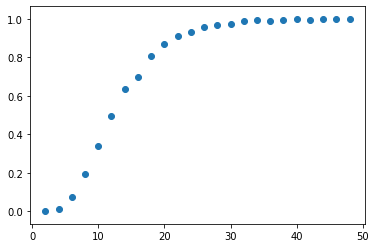

In [16]:
import matplotlib.pyplot as plt
x=[]
y=[]
for i in range(2,50,2):
    x.append(i)
    y.append(probabilité(i,5))

plt.scatter(x,y)
plt.show()

On peut observer que pour plus de 25 lancers environ, la probabilité est très proche de 1.

# Rantanplan
(bonus : juste pour le plaisir de programmer)
3 Daltons forment un triangle et Rantanplan se trouve entre les 3. Il se dirige vers un premier Dalton et après avoir parcouru la moitié du chemin, choisit un Dalton et se dirige vers lui. Puis, à mi-chemin, s'arrête et se dirige encore vers un autre Dalton qui l'appelle.

Programmer les points d'arrêts de Rantanplan et visualiser quelle figure tous ces points forment.


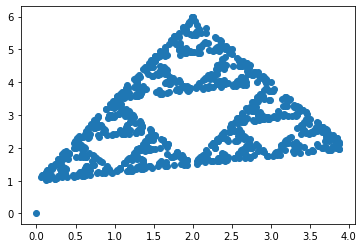

In [54]:
import matplotlib.pyplot as plt
#from matplotlib import show
from random import randint
a=[0,1]
b=[2,6]
c=[4,2]
x=[]
y=[]
r=[0,0]
x.append(r[0])
y.append(r[1])
for i in range(1000):
    d=randint(1,3)
    if d==1:
        r[0]=(r[0]+a[0])/2
        r[1]=(r[1]+a[1])/2
    if d==2:
        r[0]=(r[0]+b[0])/2
        r[1]=(r[1]+b[1])/2
    if d==3:
        r[0]=(r[0]+c[0])/2
        r[1]=(r[1]+c[1])/2
    x.append(r[0])
    y.append(r[1])
plt.scatter(x,y)
plt.show()
    

On observe ici un triangle de Sierpinski.